# Digit Recognizer - MNIST, Keras

## Problem Statement

In this notebook, we will try to solve a deep learning related problem - "**Detecting digits from hand-drawn images"**.

This problem is hosted on Kaggle as - _Digit Recognizer Learn computer vision fundamentals with the famous MNIST data_ @ https://www.kaggle.com/c/digit-recognizer/overview

Our goal is to come up with a neural network model which is capable of predicting a digit from hand-written image.

<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>
<!-- Notebook Check -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-3600373850128255"
     data-ad-slot="2651335722"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

### Importing the dataset

In [1]:
# Kaggle API stuffs
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

# Downloading titanic dataset
#api.competition_download_files('digit-recognizer')

# Unzip digit-recognizer.zip
#import zipfile
#with zipfile.ZipFile("digit-recognizer.zip","r") as zip_ref:
#    zip_ref.extractall("digit-recognizer_data")
    
# Loading Dataset
#! pip3 install pandas
import pandas as pd

df_train = pd.read_csv('digit-recognizer_data/train.csv')
df_test = pd.read_csv('digit-recognizer_data/test.csv')
print(df_train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

## Exploratory Data Analysis

From the sample, we may infer that label column will range from 0-9 and there are 784 pixel values provided (28x28 dimension).

In [2]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Since the pixel values range from 0-254, the images must be stored in grey-scale format.

### Class Imbalance

Since we are dealing with labels 0-9 or a 10 class problem, it is always advised to check for class imbalance.

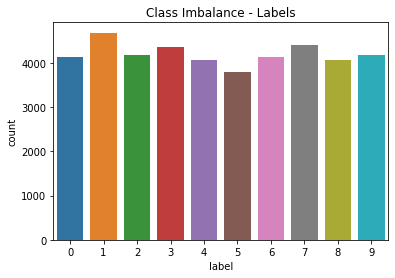

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="label", data=df_train).set_title("Class Imbalance - Labels")
plt.show()

The labels seem to be nearly balanced. So we can forget about class imbalance issue here.

### Dealing Missing Values.


In [4]:
# Columns with NAs
print(df_train.columns[df_train.isna().any()].tolist())
print(df_test.columns[df_test.isna().any()].tolist())

[]
[]


Since there are no missing values in the dataset we may proceed to data scaling.

### Scaling Numeric Variables

All pixel values range from 0 to 254 and we may just divide all by 254 to get corresponding mapping in [0,1].

In [5]:
# UDF for scaling
def scaler(pixel):
    return ((pixel)/254)

In [6]:
# Splitting variables
X_T = df_train.drop(['label'], axis=1)
Y_T = df_train.label
X_T.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Applying UDF
X_T = X_T.apply(scaler) 
X_Test = df_test.apply(scaler) 
X_T.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000863,0.000461,0.000232,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024854,0.018243,0.012892,0.006929,0.007459,0.001631,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.996063,0.996063,1.000000,0.244094,0.0,0.0,0.0,0.0


### Encoding categorical response variable - One hot Encoding

In [ ]:
from keras.utils.np_utils import to_categorical
Y_T= to_categorical(Y_T)
Y_T.head()